# Aprendizaje supervisado
_José Luis Ruiz Reina_<br>
_F. J. Martín Mateos_<br>
_Departamento de Ciencias de la Computación e Inteligencia Artificial_<br>
_Universidad de Sevila_

El paquete de _Python_ [scikit-learn](http://scikit-learn.org) (_sklearn_ en lo que sigue) proporciona un marco de trabajo para el aprendizaje automático.

## Árboles de decisión

In [1]:
import sklearn
import numpy as np
import matplotlib
import pandas as pd
#import graphviz

In [2]:
print(sklearn.__version__)

0.24.2


_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`. Son árboles de decisión binarios construidos asumiendo atributos continuos. Este método distinto al algoritmo _ID3_ que hemos visto, el cuál no está implementado.

En http://scikit-learn.org/stable/modules/tree.html se puede encontrar información acerca de los árboles de decisión implementados en _sklearn_.

Los ejemplos y la discusión que sigue está tomada del libro:

[*Introduction to Machine Learning with Python*](http://shop.oreilly.com/product/0636920030515.do)  
**Andreas C. Müller & Sarah Guido**  
O'Reilly 2017

Github con el material del libro: [Github](https://github.com/amueller/introduction_to_ml_with_python). 

El libro está accesible *online* desde la [Biblioteca de la Universidad de Sevilla](https://fama.us.es), como recurso electrónico.

Antes que nada, cargamos el módulo `mglearn` (recordar que para que funcione la carga, debemos poner la carpeta `mglearn` en cualquiera de las carpetas que usa python para cargar sus módulos).

In [3]:
import mglearn

Un arbol de dedicisión es una representación de conocimiento en forma de arbol, en el que las hojas con la respuesta o decisión a tomar y el camino hacia las mismas nos dan una descripción de una situación o individuo concreto.

**Graphviz:** Partes del código a continuación generan representaciones de árboles. Para esto es necesario instalar el paquete de python graphviz (!pip install --user graphviz). Además es necesario instalar en el ordenador el programa Graphviz, el cuál está disponible en windows, linux y mac en su página web: https://www.graphviz.org/download/. Dado que es dificil de localizar, se proporciona el enlace de descarga de la aplicación para Windows 64: https://gitlab.com/api/v4/projects/4207231/packages/generic/graphviz-releases/2.49.3/stable_windows_10_cmake_Release_x64_graphviz-install-2.49.3-win64.exe. Este requisito es solo para las visualizaciones de árboles, por lo que es opcional.
- Posible error (Windows): failed to execute ['dot', '-Tpng', '-O', 'tmp'], make sure the Graphviz executables are on your systems' PATH
- Solución: añadir la ruta de la carpeta `bin` de Graphviz (por ejemplo `D:/Program Files (x86)/Graphviz2.38/bin/`) a la varibale de entorno `PATH` del sistema. Esto se puede hacer desde la configuración de Windos o bien mediante el siguiente código:

`import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'`


In [4]:
# !pip install --user graphviz

In [5]:
# !pip install graphviz

**Nota:** Nótese que el correcto funcionamiento de `graphviz` y de la librería `mglearn` no es un requisito indispensable para la realización de la práctica ni de ningún ejercicio relacionado con la misma. Por un lado, `graphviz` nos permite representar gráficamente árboles de decisión, y por otro lado, `mglearn` es usada por el profesor durante su explicación para mostrar ejermplos del libro `Introduction to Machine Learning with Python`.

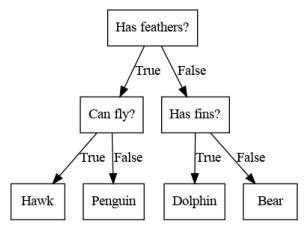

In [6]:
mglearn.plots.plot_animal_tree()

Una de las grandes ventajas de los árboles de decisión es su **interpretabilidad**.

#### CART
- **CART** es el algoritmo de aprendizaje de árboles de decisión implementado por scikit-learn. 
- Podemos usarlo tanto para clasificación como para regresión:
    - DecisionTreeClassifier
    - DecisionTreeRegressor

- Este algoritmo trabaja sobre variables numéricas y realiza un corte binario en cada nodo.
- Veamos paso a paso el proceso de construcción del arbol. Cada *split* dividirá en dos una regicón del espacio de clasificación.

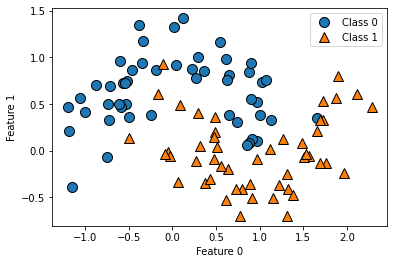

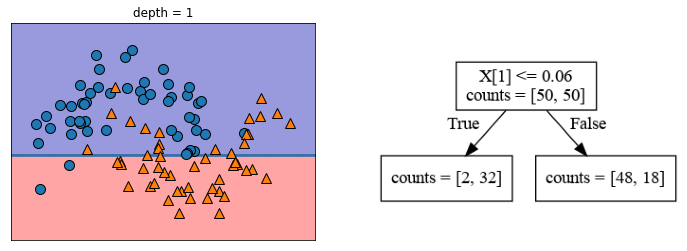

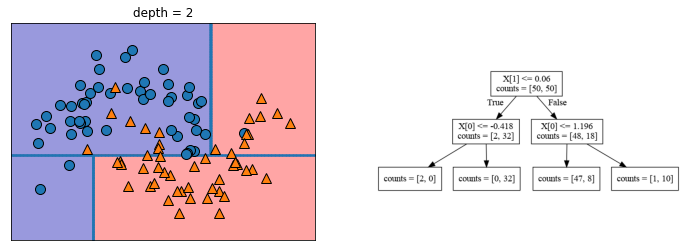

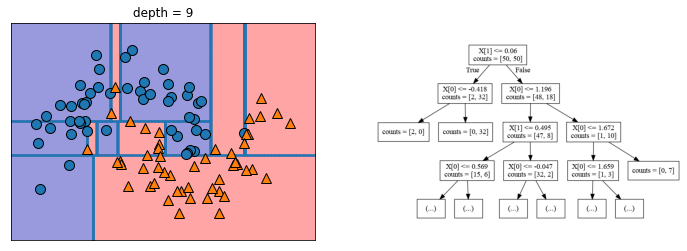

In [7]:
mglearn.plots.plot_tree_progressive()

##### El problema del sobreajuste

- El algoritmo seguirá añadiendo nuevos nodos hasta que cada hoja sea pura, es decir, hasta que todas las instancias representadas por cada hoja sean de la misma clase.
- El riesgo de sobreajuste que esto implica es elevado.
- En la imagen anterior podemos ver pequeñas regiones de color salmon intercaladas en zonas que son mayoritariamente azules. 

<!--- ![](https://live.staticflickr.com/65535/48057305423_fd0c7bb38f_k.jpg) -->
![](https://live.staticflickr.com/65535/48057305423_cf96d5aba0_h.jpg)

#### Reduciendo la complejidad del modelo
- Scikit-learn no proporciona métodos de post-poda
- Pre-poda: podemos controlar la complejidad del modelo añadiendo criterios de parada para limitar así el crecimiento del árbol.
- Veamos los diferentes paŕametros con los que podemos configurar el algoritmo:

In [8]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(random_state=0)

DecisionTreeClassifier(random_state=0)

Los parámetros más importantes para controlar la complejidad del modelo son los siguientes:
- max_depth
- max_leaf_nodes
- min_samples_leaf

Veamos un ejemplo de sobreajuste en árboles decisión, para esto usaremos el conjunto de datos sobre cáncer de mama.

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
cancer.data.shape

(569, 30)

In [11]:
cancer.target.shape

(569,)

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Train
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
confusion = confusion_matrix(y_train, tree.predict(X_train))
print("Confusion matrix:\n{}".format(confusion))

# Test
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
confusion = confusion_matrix(y_test, tree.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Accuracy on training set: 1.000
Confusion matrix:
[[159   0]
 [  0 267]]
Accuracy on test set: 0.937
Confusion matrix:
[[49  4]
 [ 5 85]]


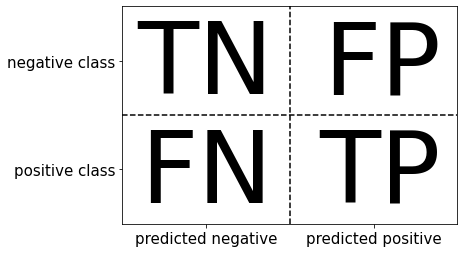

In [14]:
mglearn.plots.plot_binary_confusion_matrix()

¿Qué propiedades tiene el arbol obtenido?

In [15]:
tree.tree_.node_count

35

In [16]:
tree.tree_.max_depth

7

- Hemos obtenido una clasificación perfecta en el conjunto de entrenamiento.
- Veamos ahora que ocurre si limitamos la profundidad del árbol.

In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

# Train
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
confusion = confusion_matrix(y_train, tree.predict(X_train))
print("Confusion matrix:\n{}".format(confusion))

# Test
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
confusion = confusion_matrix(y_test, tree.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Accuracy on training set: 0.988
Confusion matrix:
[[154   5]
 [  0 267]]
Accuracy on test set: 0.951
Confusion matrix:
[[49  4]
 [ 3 87]]


- Hemos obtenido peor clasificación en el conjunto de entrenamiento. Sin embargo, hemos mejorado la puntuación en el conjunto de evaluación.
- Nuestro primer modelo estaba sobreajustado sobre el conjunto de entrenamiento.

¿Qué propiedades tiene el arbol obtenido?

In [18]:
tree.tree_.node_count

21

In [19]:
tree.tree_.max_depth

4

#### Explorando el árbol de decisión
- Recordemos que una de las grandes ventajas de los árboles de decisión es que son intuitivos y no se requieren conomientos técnicos para entenderlos.
- Graphviz son un conjunto de herramientas y librerías auxiliares de código libre usadas por gran cantidad de sistemas para la representación gráfica de todo tipo de diagramas (grafos, árboles, etc.).

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

- Veamos como ha quedado nuestro arbol de profundidad 4.

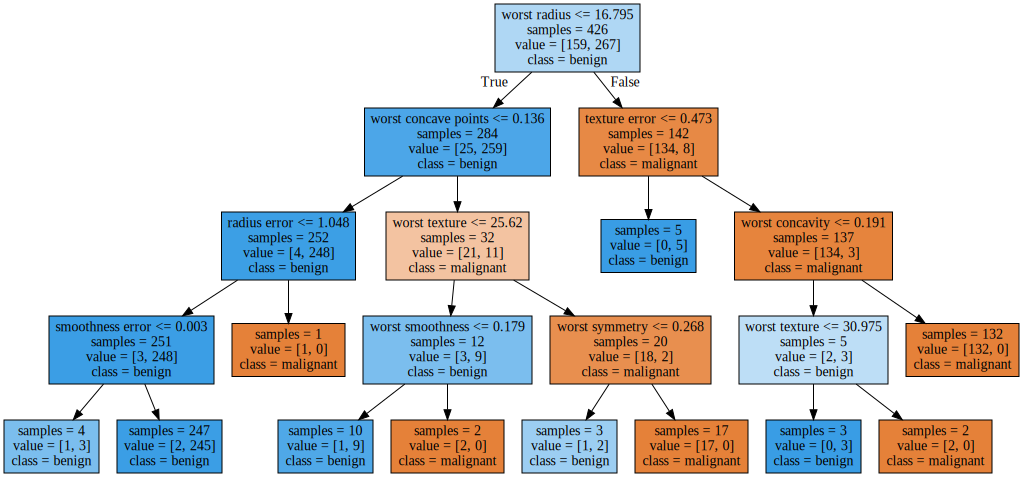

In [21]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Con árboles mayores, al gráfico puede ser más dificil de explorar. Sin embargo, nos proporciona información adicional de gran utilidad.
- En nuestro caso, vemos que solo con el primer corte es posible explicar la mayor parte del problema.
- Veamos como quedaría un árbol de profundidad 1.

In [22]:
tree = DecisionTreeClassifier(max_depth=1, random_state=0)
tree.fit(X_train, y_train)

# Train
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# Test
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.923


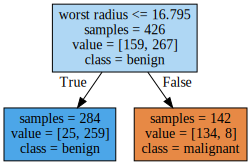

In [23]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Esquemas de evaluación de modelos 

In [24]:
from preamble import *
%matplotlib inline
import mglearn

Veremos cómo evaluar los modelos que se aprendan a partir de los datos. Es muy importante poder evaluar los modelos que se aprenden, especialmente por dos cuestiones:

- Cuantificar de alguna medida cómo de bueno es un modelo y su capacidad para generalizar de manera adecuada en conjunto de datos nuevos, en los que no se conozca su clasiicación.
- Ser capaz de comparar entre varios moldelos, por ejemplo en la fase de ajuste para decidir que valores de los hiperparámetros son los más adecuados. 

## Cuestiones metodológicas

En esta sección vemos metodologías para realizar la evaluación de los modelos 

### El método *Holdout*

Hasta ahora, el método que hemos usado para estimar el rendimiento de un clasificador de una manera objetiva es el método *hold out*, consistente en dividir el conjunto de datos en *entrenamiento* y *test*. Esto lo hace la función `train_test_split`. Por ejemplo:  

In [25]:
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Regresión logística entrenado
dt = DecisionTreeClassifier().fit(X_train, y_train)
# Evaluación con tasa de aciertos
print("Rendimiento sobre test: {:.2f}".format(dt.score(X_test, y_test)))

Rendimiento sobre test: 0.92


### Validación cruzada

El siguiente dibujo explica cómo se realiza validación cruzada: se divide el conjunto de datos en k partes iguales (preferentemente estratificadas) y se realizan k aprendizajes en el que se deja una de las partes fuera como conjunto en el que evaluar lo aprendido. La media de las evaluaciones es la evaluación que devuelve el método de validación cruzada. **Nota**: finalmente, el modelo se entrena con todo el conjunto de sdatos, y lo que obtiene validación cruzada puede verse como una evaluación de ese modelo final. 

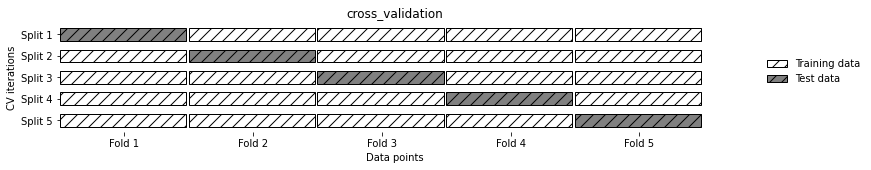

In [26]:
mglearn.plots.plot_cross_validation()

#### Validación cruzada en scikit-learn

La funcion `cross_val_score` del módulo `model_selection` implementa validación cruzada en scikit-learn. Tiene un parámetro `cv` que indica la estrategia de partición usada. Por defecto, tres trozos estratificados (es decir, tratando de que cada trozo tenga la misma proporción de clases que el original). En general `cv=k`, siendo `k` un entero, significa validación cruzada con `k` trozos estratificados. Pero se admiten más opciones para este parámetro. La métrica por defecto es la tasa de aciertos (`score`), pero también se puede cambiar esto con el parámetro `scoring`. 

El resultado que devuelve un array con los respectivos resultados de evaluar en cada una de las rondas de la validación cruzada. Por ejemplo: 

In [27]:
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris

dt = DecisionTreeClassifier()

# iris = load_iris()
# scores = cross_val_score(dt, iris.data, iris.target)

scores = cross_val_score(dt, cancer.data, cancer.target)
print("Resultados de la evaluación cruzada: {}".format(scores))

Resultados de la evaluación cruzada: [0.912 0.939 0.921 0.956 0.903]


Es bastante común devolver la media de los rendimientos obtenidos en cada validación. Veamos por ejemplos validación cruzada con 5 _folders_:

In [28]:
# scores = cross_val_score(dt, iris.data, iris.target, cv=5, verbose=0)
scores = cross_val_score(dt, cancer.data, cancer.target, cv=5)
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.2f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.912 0.904 0.921 0.965 0.894]
Evaluación media: 0.92


#### Ventajas de la validación cruzada

- No dependemos de la partición concreta, asegurándonos que todos los ejemplos forman parte al menos una vez de un conjunto de prueba
- Proporciona información sobre cómo de sensible es el modelo al conjunto de entrenamiento que usemos, ya que se producen varios entrenamientos y evaluaciones.
- Se aprovechan mejor los datos disponibles

**Desventaja**: Puede llegar a tener un coste computacional alto.

### Validación cruzada estratificada

A la hora de obtener las distintas particiones con las que llevar a cabo validación cruzada, es importante en muchos casos la  *estratificación* que se comentó más arriba: procurar que en cada una de las particiones la proporción de cada clase sea similar a la proporción en todo el conjunto. Por defecto, scikit learn realiza particiones estratificadas, si en el parámetro `cv` se proporciona el número de particiones. El siguiente dibujo lo esquematiza:

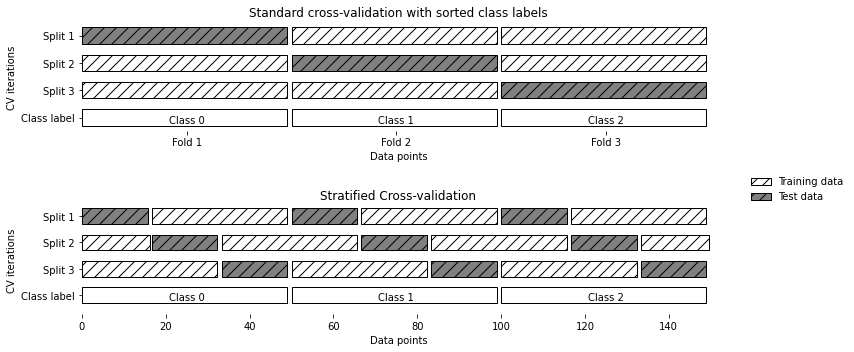

In [29]:
mglearn.plots.plot_stratified_cross_validation()

Vamos a ver con un ejemplo qué puede ocurrir si no hacemos particiones estratificadas. Para ello, consideremos el conjunto de datos del iris, con tres clases, en el que los ejemplos están ordenados por clases:

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Clases Iris:\n{}".format(iris.target))

Clases Iris:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Nota**: El parámetro `cv`, ademas de poder recibir un número entero con el número de particiones estratificadas, puede recibir distintas formas de especificar las particiones. 

Por ejemplo un objeto de la clase `KFold` puede ser un posible valor para el parámetro `cv` (un `Kfold` es en realidad un iterador cuyos elementos son particiones de los índices de los ejemplos en test y train). Al crear el objeto `Kfold` se indica el número de particiones, pero las particiones se hacen de manera secuencial, sin estratificar. Podríamos por ejemplo, especificar tres particiones sin estratificar de la siguiente manera:

In [31]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

El resultado de la validación sería desastroso para el ejemplo del Iris:

In [32]:
print("Resultados de la validación cruzada sin estratificar:\n{}".format(
    cross_val_score(dt, iris.data, iris.target, cv=kfold)))

Resultados de la validación cruzada sin estratificar:
[0. 0. 0.]


Una manera de arreglarlo sería haciando un shuffle en `Kfold`

In [33]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Resultados de la validación cruzada sin estratificar pero reordenando previamente de manera aleatoria:\n{}".format(
    cross_val_score(dt, iris.data, iris.target, cv=kfold)))

Resultados de la validación cruzada sin estratificar pero reordenando previamente de manera aleatoria:
[0.96 0.96 0.96]


O bien directamente hacer validación cruzada estratificada:

In [34]:
print("Resultados de la validación cruzada:\n{}".format(
    cross_val_score(dt, iris.data, iris.target, cv=3)))

Resultados de la validación cruzada:
[0.98 0.94 0.98]


### Variaciones sobre validación cruzada

El parámetro `cv`, cuando recibe un número natural $n$, indica el número de particiones (y de validaciones) a realizar, siendo las particiones estratificadas. Pero existen otras opciones para ese parámetro, que se dan a través de objetos de distintas clases que proporcionan maneras de iterar sobre distintas particiones. Veamos algunos ejemplos

#### *Leave-one-out* 

Con `LeaveOneOut` obtenemos iteradores para obtener un numero de particiones igual al número de ejemplos, en los que cada vez se evalúa sobre un ejemplo el resultado de entrenar con el resto.  

In [35]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(dt, iris.data, iris.target, cv=loo)
print("Número de iteraciones con cv: ", len(scores))
print("Media de las evaluaciones (tasas de acierto media): {:.2f}".format(scores.mean()))

Número de iteraciones con cv:  150
Media de las evaluaciones (tasas de acierto media): 0.94


Obviamente, este método de validación puede llegar a ser muy costoso en tiempo, sobre todo si el conjunto de datos es muy grande. Pero a veces es una buena opción para conjuntos de datos pequeños, proporcionando buenas estimaciones.   

# Aprendizaje supervisado

Para ilustrar el concepto de aprendizaje supervisado vamos a usar el conjunto de datos [_Car Evaluation_](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) del repositorio [UCI](http://archive.ics.uci.edu/ml/). Este conjunto de datos contiene información acerca de la idoneidad de una serie de coches, en función de los siguientes atributos:
* _buying_: precio de compra. Posibles valores: vhigh, high, med, low.
* _maint_: coste de mantenimiento. Posibles valores: vhigh, high, med, low.
* _doors_: número de puertas. Posibles valores: 2, 3, 4, 5more.
* _persons_: número de asientos. Posibles valores: 2, 4, more.
* *lug\_boot*: tamaño del maletero. Posibles valores: small, med, big.
* _safety_: nivel de seguridad estimada. Posibles valores: low, med, high.

La idoneidad de cada coche se indica mediante el atributo _acceptability_, que los clasifica como _unacc_, _acc_, _good_ o _vgood_.

## Preparación de datos

Para leer los datos desde el fichero `cars.csv` que se proporciona se pueden evaluar las siguientes expresiones ([_Pandas_](http://pandas.pydata.org/) y [_NumPy_](http://www.numpy.org/) son paquetes de _Python_ para análisis de datos y cálculo científico, respectivamente):

In [36]:
cars = pd.read_csv('data/cars.csv', header=None,
                       names=['buying', 'maint', 'doors', 'persons',
                              'lug_boot', 'safety', 'acceptability'])
print(cars.shape)  # Número de filas y columnas
cars.head(10)

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


_sklearn_ no puede trabajar directamente con el conjunto de datos anterior, ya que asume que los valores de las variables discretas están codificadas con números enteros. Para transformar los datos a un formato adecuado ofrece diversas operaciones de preprocesamiento, entre las que se encuentra _LabelEncoder_.

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()  # Creamos un codificador de etiquetas
le.fit(cars['buying'])  # Calculamos la codificación de cada valor
print(le.classes_)
print(le.transform(['vhigh', 'med', 'high', 'low', 'vhigh']))  # Codificamos los valores
print(le.inverse_transform([3, 2, 0, 1, 3]))  # Descodificamos los códigos

['high' 'low' 'med' 'vhigh']
[3 2 0 1 3]
['vhigh' 'med' 'high' 'low' 'vhigh']


Hay que repetir el esquema anterior para cada columna de la tabla de datos. Además, conservaremos los codificadores de cada columna para poder usar la misma codificación con nuevos ejemplos.

In [38]:
codificadores = []
cars_codificado = pd.DataFrame()
for variable, valores in cars.iteritems():
    le = preprocessing.LabelEncoder()
    le.fit(valores)
    print('Codificación de valores para {}: {}'.format(variable, le.classes_))
    codificadores.append(le)
    cars_codificado[variable] = le.transform(valores)

cars_codificado.head(10)

# Si no es necesario conservar los codificadores, la siguiente es una manera más
# directa de codificar las variables
# le = preprocessing.LabelEncoder()
# cars_codificado = cars.apply(le.fit_transform, axis=0)

Codificación de valores para buying: ['high' 'low' 'med' 'vhigh']
Codificación de valores para maint: ['high' 'low' 'med' 'vhigh']
Codificación de valores para doors: ['2' '3' '4' '5more']
Codificación de valores para persons: ['2' '4' 'more']
Codificación de valores para lug_boot: ['big' 'med' 'small']
Codificación de valores para safety: ['high' 'low' 'med']
Codificación de valores para acceptability: ['acc' 'good' 'unacc' 'vgood']


,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


Una vez codificadas las variables, es necesario separar el conjunto de datos en dos: un conjunto de entrenamiento, que se usará para generar los distintos modelos; y un conjunto de prueba, que se usará para comparar los distintos modelos.

Un detalle a tener en cuenta es que la distribución de ejemplos en las distintas clases de aceptabilidad no es uniforme: hay 1210 coches (un 70.023 % del total) clasificados como inaceptables (`unacc`), 384 coches (22.222 %) clasificados como aceptables (`acc`), 69 coches ( 3.993 %) clasificados como buenos (`good`) y 65 coches ( 3.762 %) clasificados como muy buenos (`vgood`).

Es conveniente, por tanto, que la separación de los ejemplos se realice de manera estratificada, es decir, intentando mantener la proporción anterior tanto en el conjunto de entrenamiento como en el de prueba.

Para dividir un conjunto de datos en un subconjunto de entrenamiento y otro de prueba, _sklearn_ proporciona la función `train_test_split`.

In [39]:
from sklearn import model_selection

print('Codificación:', codificadores[-1].classes_)
print(cars_codificado.shape[0])  # Cantidad total de ejemplos
print(cars_codificado['acceptability'].value_counts(
        normalize=True, sort=False))  # Frecuencia total de cada clase de aceptabilidad

cars_entrenamiento, cars_prueba = model_selection.train_test_split(
    cars_codificado, test_size=.33, random_state=12345,
    stratify=cars_codificado['acceptability'])

# Comprobamos que el conjunto de prueba contiene el 33 % de los datos, en la misma proporción
# con respecto a la variable objetivo
print(cars_prueba.shape[0], 1728 * .33)
print(cars_prueba['acceptability'].value_counts(
        normalize=True, sort=False))

# Comprobamos que el conjunto de entrenamiento contiene el resto de los datos, en la misma
# proporción con respecto a la variable objetivo
print(cars_entrenamiento.shape[0], 1728 * (1 - .33))
print(cars_entrenamiento['acceptability'].value_counts(
        normalize=True, sort=False))

Codificación: ['acc' 'good' 'unacc' 'vgood']
1728
2    0.70
0    0.22
3    0.04
1    0.04
Name: acceptability, dtype: float64
571 570.24
2    0.70
0    0.22
1    0.04
3    0.04
Name: acceptability, dtype: float64
1157 1157.7599999999998
0    0.22
2    0.70
3    0.04
1    0.04
Name: acceptability, dtype: float64


Para realizar aprendizaje supervisado en _sklearn_ basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (árboles de decisión, _naive_ Bayes, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

Un requisito para poder continuar es separar los conjuntos de datos `cars_entrenamiento` y `cars_prueba` en los valores de los atributos por un lado y la clasificación por otro.

In [40]:
X_train = cars_entrenamiento.loc[:, 'buying':'safety']
y_train = cars_entrenamiento['acceptability']

X_test = cars_prueba.loc[:, 'buying':'safety']
y_test = cars_prueba['acceptability']

- Ahora estamos listos para entrenar un arbol de decisión.

- Mejor hagámoslo usando valdiación cruzada

- ¿Debemos reducir la profundidad del arbol?

# ANEXO: Análisis de los criterios de separación

Veamos ahora con más detalle cómo se buscan los mejores criterios de separación en el algoritmo CART. Estos criterios de separación consisten en comparar el valor de una característica con una cota, separando las muestras que tienen un valor menor o igual que la cota de aquellas que tienen un valor mayor que la cota. El funcionamiento del criterio es simple, al igual que la forma de calcular el mejor de todos: el que tiene un valor más bajo de la suma ponderada de los grados de impureza. Veamos a continuación como se escogen las cotas con respecto a las cuales se definen estos criterios.

En este ejemplo, volveremos a trabajar con el conjunto de datos sobre cancer, por lo que a continuación, volvemos a prepararlo.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

Fijémonos en una característica en concreto, por ejemplo *'worst radius'*. Primero debemos considerar todas las muestras asociadas al nodo en el que estamos buscando el criterio de separación, fijándonos en el valor de esta característica junto con su valor de clasificación.

- Primero obtenemos el índice de la característica que queremos explorar.

In [42]:
np.where(cancer.feature_names == 'worst radius')

(array([20]),)

In [43]:
cancer.feature_names[20]

'worst radius'

In [44]:
worst_radius_index = 20

- Obtenemos una lista de pares (worst radius, valor de la variable respuesta).

In [45]:
n_samples = y_train.shape[0]
Xy_pair = [(X_train[i, worst_radius_index], y_train[i]) for i in range(n_samples)]
Xy_pair

[(23.73, 0),
 (13.62, 1),
 (22.25, 0),
 (19.85, 0),
 (27.66, 0),
 (19.18, 0),
 (13.15, 1),
 (25.38, 0),
 (23.32, 0),
 (9.968, 1),
 (16.76, 1),
 (15.53, 0),
 (18.55, 0),
 (16.86, 0),
 (15.44, 1),
 (20.27, 0),
 (15.8, 1),
 (9.414, 1),
 (15.34, 1),
 (13.35, 1),
 (15.93, 0),
 (16.3, 1),
 (9.262, 1),
 (13.64, 1),
 (10.67, 1),
 (14.45, 1),
 (16.25, 1),
 (10.01, 1),
 (22.03, 0),
 (15.63, 1),
 (15.2, 0),
 (32.49, 0),
 (18.49, 0),
 (16.77, 1),
 (13.74, 1),
 (13.35, 1),
 (14.41, 1),
 (11.92, 1),
 (13.33, 1),
 (12.36, 1),
 (20.47, 0),
 (12.13, 1),
 (13.72, 1),
 (14.37, 1),
 (15.61, 1),
 (13.75, 1),
 (16.46, 1),
 (14.1, 1),
 (13.36, 1),
 (9.077, 1),
 (13.13, 1),
 (19.76, 0),
 (15.47, 0),
 (29.92, 0),
 (14.54, 1),
 (21.58, 0),
 (14.34, 1),
 (14.69, 1),
 (20.8, 0),
 (18.07, 0),
 (11.06, 1),
 (16.41, 1),
 (10.6, 1),
 (20.38, 0),
 (13.19, 1),
 (20.39, 0),
 (15.15, 1),
 (17.18, 1),
 (18.07, 0),
 (24.29, 0),
 (12.68, 1),
 (30.0, 0),
 (22.63, 0),
 (14.92, 1),
 (16.11, 1),
 (14.91, 1),
 (14.17, 1),
 (10.6

- A continuación ordenamos estas muestras con respecto al valor de la característica. Para ello es suficiente con ordenar la lista de parejas anterior con la función `sorted`.

In [46]:
Xy_sorted = sorted(Xy_pair)
Xy_sorted

[(7.93, 1),
 (8.678, 1),
 (8.952, 1),
 (8.964, 1),
 (9.077, 1),
 (9.092, 1),
 (9.262, 1),
 (9.414, 1),
 (9.473, 1),
 (9.507, 1),
 (9.565, 1),
 (9.628, 1),
 (9.733, 1),
 (9.968, 1),
 (10.01, 1),
 (10.06, 1),
 (10.17, 1),
 (10.23, 1),
 (10.31, 1),
 (10.41, 1),
 (10.49, 1),
 (10.51, 1),
 (10.57, 1),
 (10.6, 1),
 (10.65, 1),
 (10.67, 1),
 (10.75, 1),
 (10.75, 1),
 (10.83, 1),
 (10.84, 1),
 (10.85, 1),
 (10.85, 1),
 (10.88, 1),
 (10.92, 1),
 (10.93, 1),
 (10.94, 1),
 (11.02, 1),
 (11.02, 1),
 (11.05, 1),
 (11.06, 1),
 (11.11, 1),
 (11.14, 1),
 (11.16, 1),
 (11.16, 1),
 (11.17, 1),
 (11.21, 1),
 (11.24, 1),
 (11.25, 1),
 (11.26, 1),
 (11.28, 1),
 (11.35, 1),
 (11.38, 1),
 (11.48, 1),
 (11.52, 1),
 (11.54, 1),
 (11.6, 1),
 (11.66, 1),
 (11.87, 1),
 (11.92, 1),
 (11.92, 1),
 (11.92, 1),
 (11.93, 1),
 (11.94, 1),
 (11.95, 1),
 (11.98, 1),
 (11.99, 1),
 (12.02, 1),
 (12.04, 1),
 (12.09, 1),
 (12.13, 1),
 (12.2, 1),
 (12.25, 1),
 (12.32, 1),
 (12.32, 1),
 (12.33, 1),
 (12.34, 1),
 (12.36, 1),
 (1

- Ahora buscamos los valores de la característica entre los que el valor de clasificación cambia. Una forma de hacer esto consiste en emparejar cada dato con el siguiente y considerar aquellas parejas en las que el valor de clasificación cambia. Para cada pareja encontrada nos interesa el valor medio entre los valores de la característica.

In [47]:
cotas = []
for ((vi,ci),(vj,cj)) in zip(Xy_sorted,(Xy_sorted[1:])):
    if ci != cj:
        cotas.extend([(vj+vi)/2])      
cotas

[13.219999999999999,
 13.24,
 13.355,
 13.36,
 13.73,
 13.74,
 14.485,
 14.495000000000001,
 14.879999999999999,
 14.91,
 14.985,
 15.0,
 15.07,
 15.094999999999999,
 15.175,
 15.235,
 15.28,
 15.295,
 15.455,
 15.475000000000001,
 15.52,
 15.53,
 15.64,
 15.655000000000001,
 15.665,
 15.75,
 15.870000000000001,
 15.955,
 16.215,
 16.240000000000002,
 16.305,
 16.335,
 16.345,
 16.355,
 16.375,
 16.41,
 16.42,
 16.439999999999998,
 16.795,
 17.0,
 17.025,
 17.145,
 17.22,
 17.265,
 17.29,
 17.314999999999998,
 17.34,
 17.38,
 17.384999999999998,
 17.48,
 17.509999999999998,
 18.16,
 18.225,
 19.810000000000002,
 19.835]

- Una vez se tienen los posibles valores de las cotas, basta con averiguar cual es la que disminuye en mayor medida el grado de impureza. Por ejemplo, para la primera cota candidata, se calcula la distribución de las muestras que tienen un valor de  la característica menor o igual que la cota (`dist_left`) y la distribución de las muestras que tienen un valor de la característica mayor que la cota (`dist_right`).

In [48]:
def class_distribution_by_branch(threshold):
    dist_left = [len([1 for j in range(n_samples) 
                        if X_train[j][worst_radius_index] <= threshold
                        and y_train[j] == i]) for i in range(2)] 

    dist_right = [len([1 for j in range(n_samples) 
                         if X_train[j][worst_radius_index] > threshold
                         and y_train[j] == i]) for i in range(2)]
    print("Distribución rama izquierda: ",dist_left)
    print("Distribución rama derecha: ",dist_right)
    return dist_left, dist_right

In [49]:
class_distribution_by_branch(13.22)

Distribución rama izquierda:  [0, 120]
Distribución rama derecha:  [159, 147]


([0, 120], [159, 147])

- Veamos una cota candidata superior:

In [50]:
class_distribution_by_branch(15.28)

Distribución rama izquierda:  [8, 221]
Distribución rama derecha:  [151, 46]


([8, 221], [151, 46])

- Finalmente hay que calcular la mejora en el grado de dispersión para cada criterio de separación. El índice de Gini de una distribución de datos se puede calcular con la siguiente función:


In [51]:
def gini(xs):
    n = sum(xs)
    ps = [x/n if n > 0 else 0 for x in xs]
    return 1-sum(p**2 for p in ps)

El grado de dispersión ponderado después de usar el criterio de separación es:

$$\sum^r_{i=1} \frac{|{\cal S}_i|}{|{\cal S}|} G({\cal S}_i)$$

La siguiente función calcula el grado de dispersión (índice de Gini) de un criterio de separación a partir de una muestra de datos, sus valores de clasificación, la característica considerada en el criterio y la cota con respecto a la que se compara el valor de esta característica. 

In [52]:
def indice_gini(X_data, y_data, caracteristica, cota):
    n = y_data.shape[0]
    dist_left = [len([1 for j in range(n) 
                        if X_data[j][caracteristica] <= cota
                        and y_data[j] == i]) for i in range(3)]    
    dist_right = [len([1 for j in range(n) 
                         if X_data[j][caracteristica] > cota
                         and y_data[j] == i]) for i in range(3)]
    return (sum(dist_left)*gini(dist_left)+sum(dist_right)*gini(dist_right))/n

- Veamos como queda el índice de gini para la lista de cotas de la característica *worst radius*.

In [53]:
cotas_gini = [(c,indice_gini(X_train, y_train, worst_radius_index, c)) for c in cotas]
cotas_gini

[(13.219999999999999, 0.3586025959679646),
 (13.24, 0.3609078977749152),
 (13.355, 0.3422999457189383),
 (13.36, 0.3445268025220567),
 (13.73, 0.31294127092662205),
 (13.74, 0.315071066266343),
 (14.485, 0.24515353685109062),
 (14.495000000000001, 0.24921405438809108),
 (14.879999999999999, 0.2215022749746578),
 (14.91, 0.22319204743326948),
 (14.985, 0.21573204660059123),
 (15.0, 0.21985594691780871),
 (15.07, 0.21220864463035938),
 (15.094999999999999, 0.21631850478214174),
 (15.175, 0.2003926688103294),
 (15.235, 0.20451987131008623),
 (15.28, 0.20178125477088368),
 (15.295, 0.20587750103103097),
 (15.455, 0.18596529953278038),
 (15.475000000000001, 0.19009110986318403),
 (15.52, 0.1780712120368636),
 (15.53, 0.17911948361036328),
 (15.64, 0.1728602872883189),
 (15.655000000000001, 0.17697809228883354),
 (15.665, 0.17380506307143323),
 (15.75, 0.182792155230232),
 (15.870000000000001, 0.16969306648715823),
 (15.955, 0.17772786590343087),
 (16.215, 0.1640644462567623),
 (16.240000000

- Veamos cual es el mejor corte para la característica *worst radius*. Coincide con el que ha usado el algoritmo.

In [54]:
min(cotas_gini, key = lambda t: t[1])

(16.795, 0.1424816504661773)

- Para generar una nueva ramificación en CART, calcularíamos el mejor corte entre todas las características.

In [55]:
mejores_cotas = []
for i in range(len(cancer.feature_names)):
    cotas_gini = [(c,indice_gini(X_train, y_train, i, c)) for c in cotas]
    mejor_cota = min(cotas_gini, key = lambda t: t[1])
    feature = cancer.feature_names[i]
    print('Característica: {}. Mejor corte: {}'.format(feature, mejor_cota))
    mejores_cotas.append((feature, mejor_cota))

Característica: mean radius. Mejor corte: (15.0, 0.19434729180451843)
Característica: mean texture. Mejor corte: (18.225, 0.38203039641649145)
Característica: mean perimeter. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean area. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean smoothness. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean compactness. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean concavity. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean concave points. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean symmetry. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: mean fractal dimension. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: radius error. Mejor corte: (13.219999999999999, 0.46786351914302715)
Característica: texture error. Mejor corte: (13.219999999999999, 0

- Finalmente, veamos cuál sería la mejor característica y su mejor corte para el primer nodo.

In [56]:
min(mejores_cotas, key = lambda t: t[1][1])

('worst radius', (16.795, 0.1424816504661773))